In [52]:
install.packages("statisticalModeling",repos='http://cran.us.r-project.org')

also installing the dependencies 'ggformula', 'mosaicData', 'mosaicCore', 'latticeExtra', 'ggdendro', 'gridExtra', 'mosaic'



package 'ggformula' successfully unpacked and MD5 sums checked
package 'mosaicData' successfully unpacked and MD5 sums checked
package 'mosaicCore' successfully unpacked and MD5 sums checked
package 'latticeExtra' successfully unpacked and MD5 sums checked
package 'ggdendro' successfully unpacked and MD5 sums checked
package 'gridExtra' successfully unpacked and MD5 sums checked
package 'mosaic' successfully unpacked and MD5 sums checked
package 'statisticalModeling' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\f.delgado.licona\AppData\Local\Temp\RtmpQH8N65\downloaded_packages


In [61]:
install.packages("rpart.plot",repos='http://cran.us.r-project.org')

package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\f.delgado.licona\AppData\Local\Temp\RtmpQH8N65\downloaded_packages


In [91]:
library(statisticalModeling)

In [92]:
library(rpart.plot)

In [172]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [93]:
library(rpart)

In [94]:
library(ggplot2)

In [95]:
ratio = c(2, 2,4,5,8,10,10,10,20) 
M = c(0.25,0.5,0.25,0.07,0.25,0.25,0.1,0.5,0.0125) 
pH = c(10.43,10.37,13.02,12.98,14,14.17,13.78,13.5,13.3) 
OH1 <- c(5.19,4.46,0,0,0,0,0,0,0)
OH2 <- c(89.67,91.05,1.75,2.34,0.02,0.01,0.08,0.31,0.74)
OH3 <- c(5.09,4.44,38.21,42.14,6.34,4.54,9.81,18.41,27.32)
OH4 <- c(0.02,0.02,60.04,55.52,93.64,95.45,90.11,81.28,71.94)
morph <- c("SSF", "SSF", "OSF", "OSF", "RF", "R", "RF","RF","RF")
morph <- as.factor(morph)
df = data.frame(ratio, M, pH, OH1, OH2, OH3, OH4, morph)


In [96]:
df

ratio,M,pH,OH1,OH2,OH3,OH4,morph
2,0.2500,10.43,5.19,89.67,5.09,0.02,SSF
2,0.5000,10.37,4.46,91.05,4.44,0.02,SSF
4,0.2500,13.02,0.00,1.75,38.21,60.04,OSF
5,0.0700,12.98,0.00,2.34,42.14,55.52,OSF
8,0.2500,14.00,0.00,0.02,6.34,93.64,RF
10,0.2500,14.17,0.00,0.01,4.54,95.45,R
10,0.1000,13.78,0.00,0.08,9.81,90.11,RF
10,0.5000,13.50,0.00,0.31,18.41,81.28,RF
20,0.0125,13.30,0.00,0.74,27.32,71.94,RF


In [97]:
summary(df)

     ratio              M                pH             OH1       
 Min.   : 2.000   Min.   :0.0125   Min.   :10.37   Min.   :0.000  
 1st Qu.: 4.000   1st Qu.:0.1000   1st Qu.:12.98   1st Qu.:0.000  
 Median : 8.000   Median :0.2500   Median :13.30   Median :0.000  
 Mean   : 7.889   Mean   :0.2425   Mean   :12.84   Mean   :1.072  
 3rd Qu.:10.000   3rd Qu.:0.2500   3rd Qu.:13.78   3rd Qu.:0.000  
 Max.   :20.000   Max.   :0.5000   Max.   :14.17   Max.   :5.190  
      OH2             OH3             OH4        morph  
 Min.   : 0.01   Min.   : 4.44   Min.   : 0.02   OSF:2  
 1st Qu.: 0.08   1st Qu.: 5.09   1st Qu.:55.52   R  :1  
 Median : 0.74   Median : 9.81   Median :71.94   RF :4  
 Mean   :20.66   Mean   :17.37   Mean   :60.89   SSF:2  
 3rd Qu.: 2.34   3rd Qu.:27.32   3rd Qu.:90.11          
 Max.   :91.05   Max.   :42.14   Max.   :95.45          

In [173]:
glimpse(df)

Observations: 9
Variables: 8
$ ratio <dbl> 1, 1, 2, 3, 4, 5, 5, 5, 6
$ M     <dbl> 0.2500, 0.5000, 0.2500, 0.0700, 0.2500, 0.2500, 0.1000, 0.500...
$ pH    <dbl> 10.43, 10.37, 13.02, 12.98, 14.00, 14.17, 13.78, 13.50, 13.30
$ OH1   <dbl> 5.19, 4.46, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00
$ OH2   <dbl> 89.67, 91.05, 1.75, 2.34, 0.02, 0.01, 0.08, 0.31, 0.74
$ OH3   <dbl> 5.09, 4.44, 38.21, 42.14, 6.34, 4.54, 9.81, 18.41, 27.32
$ OH4   <dbl> 0.02, 0.02, 60.04, 55.52, 93.64, 95.45, 90.11, 81.28, 71.94
$ morph <fctr> SSF, SSF, OSF, OSF, RF, R, RF, RF, RF


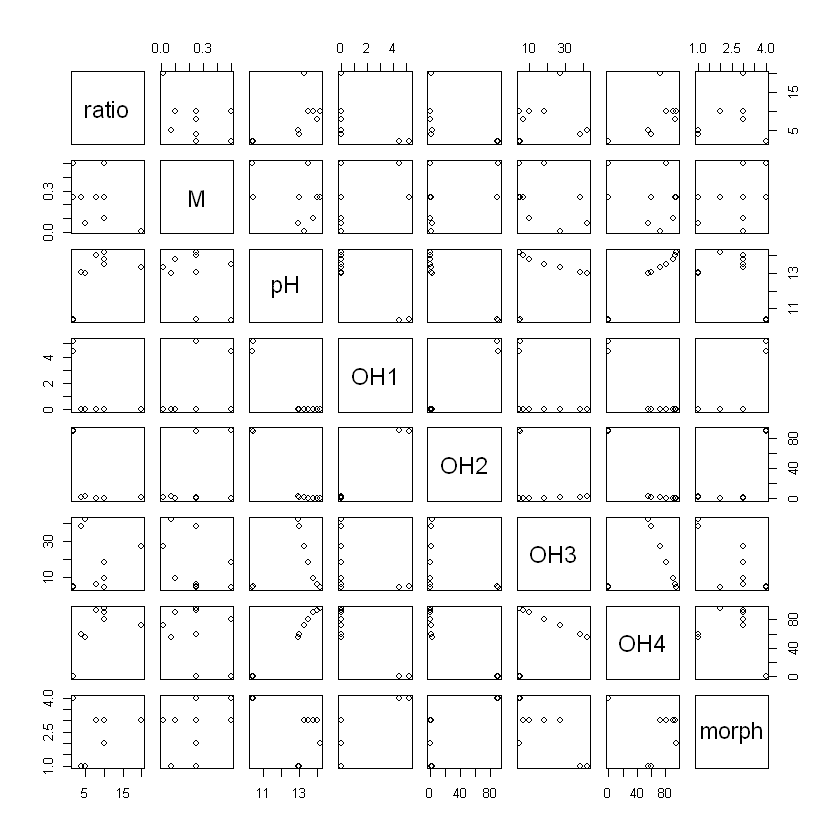

In [98]:
plot(df)

In [99]:
names(df)

[1] "ratio" "M"     "pH"    "OH1"   "OH2"   "OH3"   "OH4"   "morph"

In [163]:
model1 <- rpart(morph ~ ., method = "anova", data = df,control=rpart.control(minsplit = 1,minbucket=1, cp=0.01))

In [164]:
summary(model1)

Call:
rpart(formula = morph ~ ., data = df, method = "anova", control = rpart.control(minsplit = 1, 
    minbucket = 1, cp = 0.01))
  n= 9 

         CP nsplit rel error    xerror       xstd
1 0.7142857      0 1.0000000 1.2656250 0.41763494
2 0.2057143      1 0.2857143 0.3888889 0.18663323
3 0.0800000      2 0.0800000 0.1250000 0.09176131
4 0.0100000      3 0.0000000 0.2000000 0.12472191

Variable importance
  OH3    pH   OH1   OH2   OH4 ratio 
   42    15    11    11    11    11 

Node number 1: 9 observations,    complexity param=0.7142857
  mean=2.666667, MSE=1.111111 
  left son=2 (2 obs) right son=3 (7 obs)
  Primary splits:
      OH3   < 32.765 to the right, improve=0.7142857, (0 missing)
      ratio < 1.5    to the right, improve=0.4571429, (0 missing)
      pH    < 11.705 to the right, improve=0.4571429, (0 missing)
      OH4   < 27.77  to the right, improve=0.4571429, (0 missing)
      OH1   < 2.23   to the left,  improve=0.4571429, (0 missing)

Node number 2: 2 observations
 

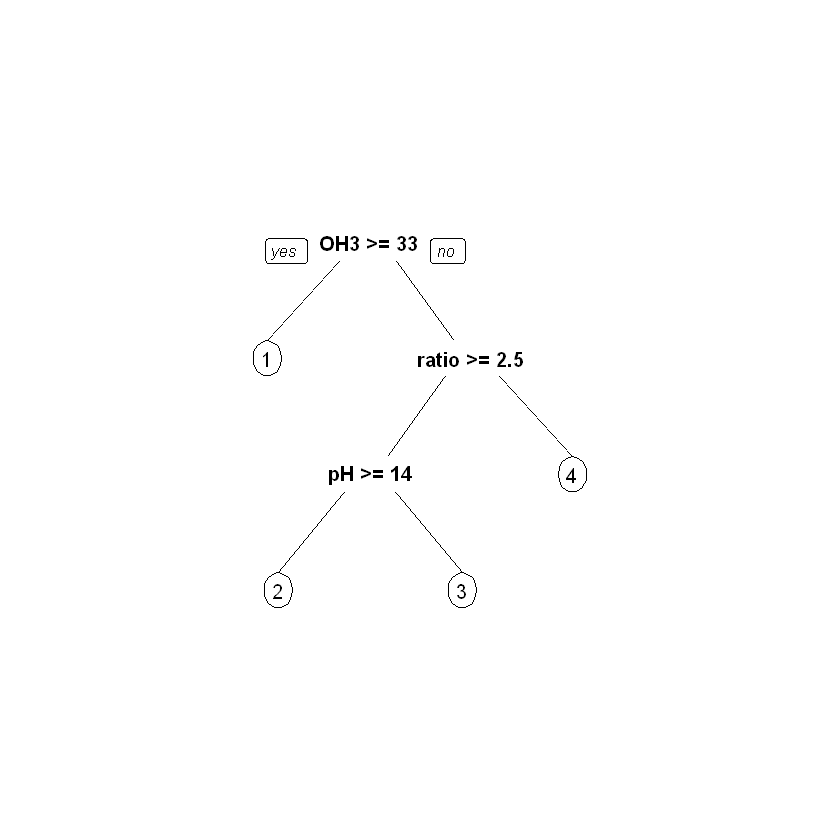

In [179]:
prp(model1)

In [174]:
levels(df$morph)

[1] "OSF" "R"   "RF"  "SSF"

In [177]:
model2 <- rpart(morph ~ ., method = "class", data = df,control=rpart.control(minsplit = 1,minbucket=1, cp=0.01))

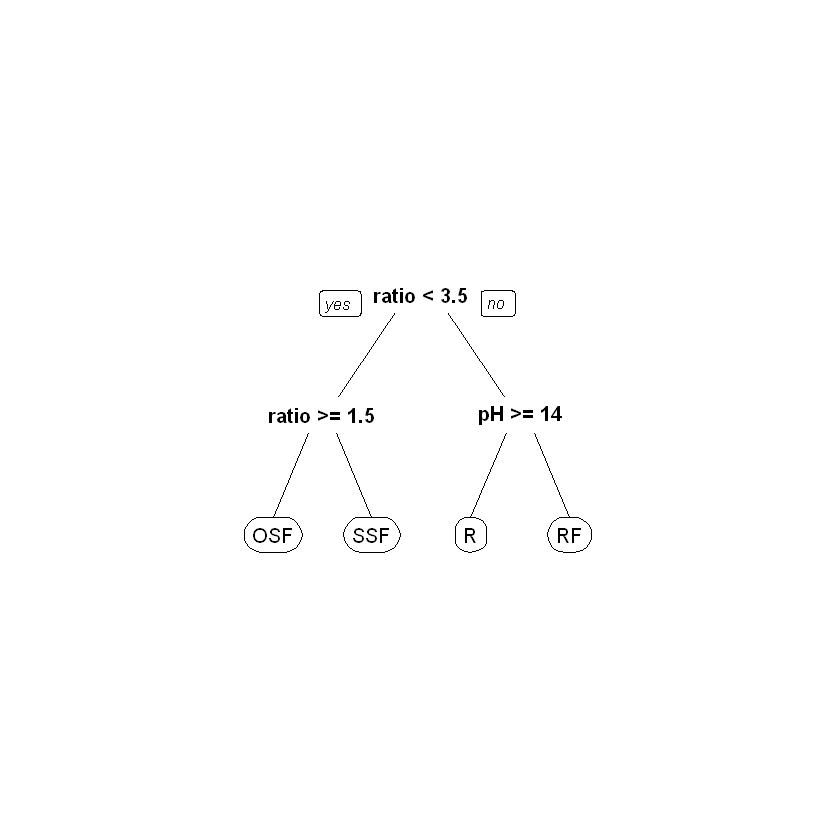

In [178]:
prp(model2)